# BIMM143 Project 3
#### Kelly Chou

### Scientific Question: Is it possible that birds have adapted to live at different altitudes due to differences in hypoxia tolerance genes, such as METTL8?

Methyltransferase like 8 (METTL8) is a hypoxia tolerance gene. It regulates the expression of MEF2C, which affects muscle hypoxia resistance. METTL8 has been shown to contribute to insulin sensitivity and muscle mass increase by activating MEF2C in high-altitude birds (https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1009270#abstract0).

### Scientific Hypothesis: If METTL8's regulation of MEF2C affects muscle hypoxia resistance, there will be a significant difference between the similarity of METTL8 sequences between different species of birds.

The mRNA sequences of the METTL8 gene for different species of birds were compared against each other for their similarities. These match scores were then plotted on a scatterplot using the difference of flying altitudes of the two species.

To answer this scientific question and test my hypothesis, I first found FASTA files with mRNA sequences for METTL8 for different species of birds. I searched up these METTL8 sequences on the NCBI database (https://www.ncbi.nlm.nih.gov/gene/79828/ortholog/?scope=8782). I downloaded each of these sequences as separate FASTA files.

I also searched up flight altitudes for each of the birds. For this analysis, we will be using the highest documented flight for each species:

Mallard ducks: 21,000 feet

Helmeted guineafowls: 9800 feet

Crane: 33,000 feet

Sparrow: 20,000 feet

Eagle: 10,000 feet

### Part 1: Load the Packages

Package Definitions:

Numpy: functionality to work with data strucutres, such as arrays;

matplotlib: data visualization to plot results with graphs and plots;

BioPython: tools and support for computational molecular biology data, such as DNA and mRNA sequences:
    
    pairwise2: tool for pairwise sequence alignment;
    Seq: tool to read in strings as sequences;
    Align: alignment tool;
    SeqIO: tool to read in FASTA files

In [28]:
# Import all packages needed
import numpy as np
import matplotlib.pyplot as plt
import Bio
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.Seq import Seq
from Bio import Align
from Bio import SeqIO

### Part 2: Load in the Data and perform Bioinformatics Analyses
The mRNA sequences of the METTL8 gene of the five different bird species were read in, each from their own FASTA files, which contained the mRNA sequences. The pairwise aligner object was created to globally align the sequences of all the sequences against each other. The match scores were compiled together, stored in a list, and printed out.

In [29]:
# Read in mRNA sequences of METTL8 gene from different bird species

for fasta in SeqIO.parse("mallard.fasta", "fasta"):
    mallard_seq = Seq(str(fasta.seq))
    
for fasta in SeqIO.parse("guineafowl.fasta", "fasta"):
    guinea_seq = Seq(str(fasta.seq))
    
for fasta in SeqIO.parse("crane.fasta", "fasta"):
    crane_seq = Seq(str(fasta.seq))
    
for fasta in SeqIO.parse("sparrow.fasta", "fasta"):
    sparrow_seq = Seq(str(fasta.seq)) 
    
for fasta in SeqIO.parse("white-tailed eagle.fasta", "fasta"):
    eagle_seq = Seq(str(fasta.seq))


# Initialize match scores list
match_scores = []

# Create PairwiseAligner object
aligner = Align.PairwiseAligner()

# Get a list of the global alignments between the two sequences

# mallard vs guineafowl
alignments = pairwise2.align.globalxx(mallard_seq, guinea_seq)
score = aligner.score(mallard_seq, guinea_seq)
match_scores.append(score)

# mallard vs crane
alignments = pairwise2.align.globalxx(mallard_seq, crane_seq)
score = aligner.score(mallard_seq, crane_seq)
match_scores.append(score)

# mallard vs sparrow
alignments = pairwise2.align.globalxx(mallard_seq, sparrow_seq)
score = aligner.score(mallard_seq, sparrow_seq)
match_scores.append(score)

# mallard vs eagle
alignments = pairwise2.align.globalxx(mallard_seq, eagle_seq)
score = aligner.score(mallard_seq, eagle_seq)
match_scores.append(score)

# guineafowl vs crane
alignments = pairwise2.align.globalxx(guinea_seq, crane_seq)
score = aligner.score(guinea_seq, crane_seq)
match_scores.append(score)

# guineafowl vs sparrow
alignments = pairwise2.align.globalxx(guinea_seq, sparrow_seq)
score = aligner.score(guinea_seq, sparrow_seq)
match_scores.append(score)

# guineafowl vs eagle
alignments = pairwise2.align.globalxx(guinea_seq, eagle_seq)
score = aligner.score(guinea_seq, eagle_seq)
match_scores.append(score)

# crane vs sparrow
alignments = pairwise2.align.globalxx(crane_seq, sparrow_seq)
score = aligner.score(crane_seq, sparrow_seq)
match_scores.append(score)

# crane vs eagle
alignments = pairwise2.align.globalxx(crane_seq, eagle_seq)
score = aligner.score(crane_seq, eagle_seq)
match_scores.append(score)

# sparrow vs eagle
alignments = pairwise2.align.globalxx(sparrow_seq, eagle_seq)
score = aligner.score(sparrow_seq, eagle_seq)
match_scores.append(score)

# Print alignment scores
print(match_scores)

[1274.0, 1165.0, 1681.0, 1453.0, 1019.0, 1621.0, 1174.0, 1188.0, 1210.0, 1500.0]


### Part 3: Create a scatterplot showing the difference in flying altitudes vs match scores between the mRNA sequences of different species
The flying altitudes of the five bird species were compiled as a list. These were then used to calculate the differences in flying altitudes between species in the same order the alignment scores were created. The differences in flying altitudes were then plotted against the match scores for the comparison of two species. I used matplotlib to create a scatterplot printed below. The title and x and y axes were labeled. The scatterplot can be analyzed to observe an upward or downward trend.

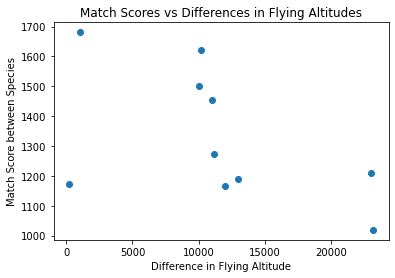

In [30]:
# Calculate differences in flying altitudes
alt_diff = []
flying_alts = [21000, 9800, 33000, 20000, 10000]
for i in range(5):
    j = i + 1
    while j < len(flying_alts): 
        alt_diff.append(abs(flying_alts[i] - flying_alts[j]))
        j = j + 1

# Combine data into a numpy array
np_altitude = np.array(alt_diff)

# Plot differences in flying altitudes against the match scores
plt.scatter(alt_diff, match_scores)

# Customize the plot
plt.title("Match Scores vs Differences in Flying Altitudes")
plt.xlabel("Difference in Flying Altitude")
plt.ylabel("Match Score between Species")

# Show the plot
plt.show()

### Part 4: Analysis of the results

I expected to see a positive correlation between the difference in flying altitudes and the match scores between species. I believed birds that flew at different altitudes would have a greater difference in the similarity of their METTL8 genes.

However, my program did not support this hypothesis as there seems to be a downward trend in the graph.

The heights used in this analysis may not be a good representation of their activity at different altitudes as some birds may live most of their lives in high altitudes while some may only migrate at high altitudes but live most of their lives in low lands. In addition, some of the references used were not as trustworthy as other sources because of the limited resources.

There also may be other factors that could be responsible for the differences in the DNA sequences. 

Thus, using altitudes at which birds fly may not be an accurate reflection of their METTL8 genes.

I could have also used other analysis methods to further investigate my results. For example, a heat map comparing the match scores against the flying attitudes could have better illustrated and provided better visualization of the results with color coordination. I could have also did principal component analysis to find and focus on the another main trend or pattern by ignoring the other less important data that I could not have noticed before. I could have also clustered together birds with similar flying altitudes to compare and constrast and possibly find different results.

### References

Amazing Waterfowl Facts. www.ducks.org/conservation/waterfowl-research-science/amazing-waterfowl-facts#:~:text=Ducks%20usually%20migrate%20at%20an,flight%20by%20North%20American%20waterfowl. 


Helmeted Guinea Fowl Facts, wildthingsafaris.com/wp-content/w3tc-config/assassin-s-gcub/helmeted-guinea-fowl-facts-9ff098. 


Carwardine, Mark (2008). Animal Records. Sterling. p. 124. ISBN 1402756232.


Tucker, Vance A. “Respiratory Physiology of House Sparrows in Relation to High-Altitude Flight.” Journal of Experimental Biology, The Company of Biologists Ltd, 1 Feb. 1968, jeb.biologists.org/content/48/1/55#:~:text=House%20sparrows%20in%20a%20hypobaric,simulated%20altitude%20of%206100%20m. 


Hu, Caitlin. “Watch: An Eagle in Dubai Claims a World Record for Highest Flight, Captures It All on Camera.” Quartz, Quartz Media, Inc., 15 Mar. 2015, qz.com/362856/watch-an-eagle-in-dubai-makes-a-world-record-for-highest-flight-captures-it-all-on-camera/#:~:text=Born%20in%20captivity%2C%20Darshan%20had,of%20up%20to%2010%2C000%20feet. 